# 1. Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import streamlit as st
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs ,init_notebook_mode ,plot ,iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

 # 2. Reading Data:

In [3]:
df=pd.read_csv('hotel_bookings.csv')

In [4]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.shape

(119390, 32)

# 3. Data Cleaning:

In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
df["agent"].value_counts()

agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: count, Length: 333, dtype: int64

In [10]:
df["company"].value_counts()

company
40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: count, Length: 352, dtype: int64

In [11]:
df.drop(['agent','company'],axis=1,inplace=True)

In [12]:
df['country'].value_counts().index[0]

'PRT'

In [13]:
df['country'].fillna(df['country'].value_counts().index[0],inplace=True)

In [14]:
df.fillna(0,inplace=True)

In [15]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

#### seems to have some dirtiness in data as Adults,babies & children cant be zero at a same time ..

### if 3 entities are 0 ,then how can a booking be possible ??

In [16]:
### Visualise Entire Dataframe where adult,children & babies are 0

filter1=(df['children']==0) & (df['adults']==0) & (df['babies']==0)

In [17]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [18]:
data=df[~filter1]

In [19]:
data.shape

(119210, 30)

In [20]:
df.shape

(119390, 30)

In [21]:
df[df['children']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


# perform Spatial Analysis:

## Where do the guests come from ?

In [22]:
data['is_canceled'].unique()

array([0, 1], dtype=int64)

In [23]:
data[data['is_canceled']==0]['country'].value_counts()/75011

country
PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
BHR    0.000013
DJI    0.000013
MLI    0.000013
NPL    0.000013
FRO    0.000013
Name: count, Length: 165, dtype: float64

In [24]:
len(data[data['is_canceled']==0])

75011

In [28]:
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns=['country','no_of_guests']
country_wise_data

,country,no_of_guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [31]:
map_guest=px.choropleth(country_wise_data,
             locations=country_wise_data['country'],
             color=country_wise_data['no_of_guests'],
             hover_name=country_wise_data['country'],
             title='Home Country of Guests',
             color_continuous_scale='Viridis'
             )

In [32]:
map_guest.show()

### Conclusion : People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe

## How much do guests pay for a room per night ?

##### Both hotels have different room types and different meal arrangements. Seasonal factors are also important. So the prices vary a lot. Since no currency information is given, but Portugal is part of the European Monetary Union, I assume that all prices are in EUR.

In [33]:
data2=data[data['is_canceled']==0]

In [34]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#### "ADR" stands for "Average Daily Rate." It is a commonly used financial metric in the hotel industry. The Average Daily Rate represents the average income earned from a room in the hotel on a given day. This metric is calculated by dividing the total room revenue by the number of rooms sold. 

Text(0, 0.5, 'price( EUR)')

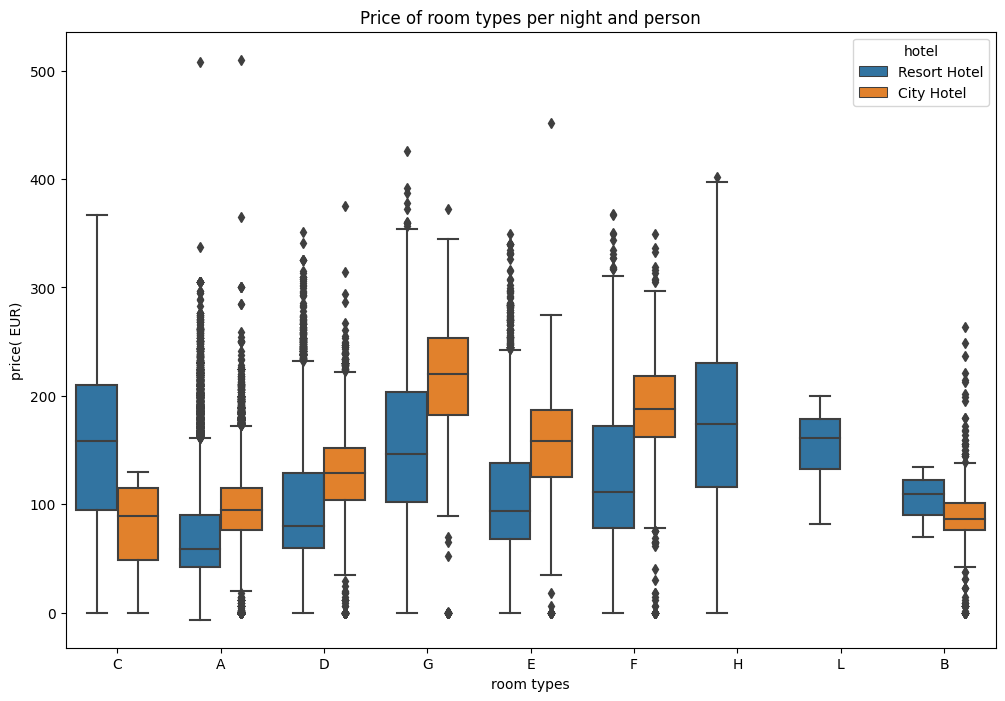

In [35]:
# seaborn boxplot:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr' ,hue='hotel',data=data2)

plt.title('Price of room types per night and person')
plt.xlabel('room types')
plt.ylabel('price( EUR)')

In [39]:
fig = px.box(data2, x='reserved_room_type', y='adr', color='hotel',
             title='Price of Room Types per Night and Person',
             labels={'reserved_room_type': 'Room Types', 'adr': 'Price (EUR)'},
             color_discrete_sequence=['blue', 'orange'])

fig.update_layout(
    xaxis_title='Room Types',
    yaxis_title='Price (EUR)'
)
fig.show()

### This figure shows the average price per room, depending on its type and the standard deviation. Note that due to data anonymization rooms with the same type letter may not necessarily be the same across hotels.

## Which are the most busy month ?

In [40]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [41]:
data_resort=data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]
data_city = data[(data['hotel']=='City Hotel') & (data['is_canceled']==0)]

In [42]:
data_resort.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [43]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no_of_guests']
rush_resort

,month,no_of_guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [44]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no_of_guests']
rush_city

,month,no_of_guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [45]:
final_rush=rush_resort.merge(rush_city,on='month')

In [46]:
final_rush.columns=['month','no_of_guests_in_resort','no_of_guests_city']

In [47]:
final_rush

,month,no_of_guests_in_resort,no_of_guests_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


### now we will observe over here is month column is not in order, & if we will visualise we will get improper conclusion , so very first we have to provide right hierarchy to the month column

In [48]:
# !pip install sorted-months-weekdays

## Dependency package needs to be installed
# !pip install sort_dataframeby_monthorweek

In [49]:
final_rush.columns

Index(['month', 'no_of_guests_in_resort', 'no_of_guests_city'], dtype='object')

In [51]:
fig = px.line(data_frame=final_rush, x='month', y=['no_of_guests_in_resort', 'no_of_guests_city'], color_discrete_sequence=['blue', 'red'])

fig.update_layout(
    title='Number of Guests in Resort and City Hotels Over Time',
    xaxis_title='Month',
    yaxis_title='Number of Guests'
)

fig.show()

In [52]:
import sort_dataframeby_monthorweek as sd

In [53]:
final_rush=sd.Sort_Dataframeby_Month(final_rush,'month')

In [54]:
final_rush.columns

Index(['month', 'no_of_guests_in_resort', 'no_of_guests_city'], dtype='object')

In [55]:
fig = px.line(data_frame=final_rush, x='month', y=['no_of_guests_in_resort', 'no_of_guests_city'], color_discrete_sequence=['blue', 'red'])

fig.update_layout(
    title='Number of Guests in Resort and City Hotels Over Time',
    xaxis_title='Month',
    yaxis_title='Number of Guests'
)

fig.show()

### Conclusion-->> This clearly shows that the prices in the Resort hotel are much higher during the summer (no surprise here)

## which month has highest adr ?

In [56]:
data=sd.Sort_Dataframeby_Month(data,'arrival_date_month')

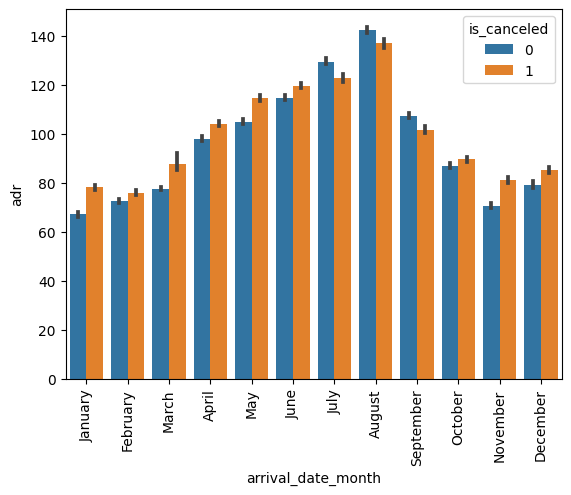

In [57]:
sns.barplot(x='arrival_date_month',y='adr',data=data ,hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()

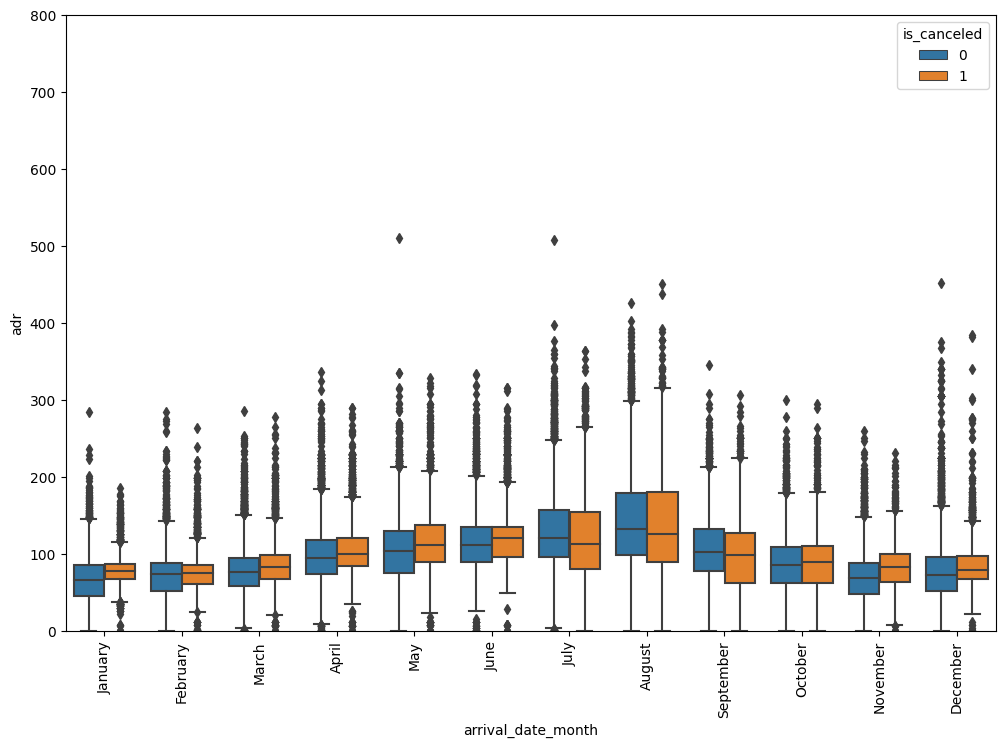

In [58]:
plt.figure(figsize=(12,8))
sns.boxplot(x='arrival_date_month',y='adr',data=data ,hue='is_canceled')
plt.xticks(rotation='vertical')


plt.ylim(0,800)
plt.show()

In [62]:
init_notebook_mode(connected=True)

In [94]:
# fig = px.bar(data, x='arrival_date_month', y='adr', color='is_canceled',
#              title='Average Daily Rate (ADR) per Month',
#              labels={'arrival_date_month': 'Month', 'adr': 'Average Daily Rate (ADR)'},
#              color_discrete_map={0: 'blue', 1: 'red'})
# fig.update_layout(
#     xaxis_title='Month',
#     yaxis_title='Average Daily Rate (ADR)',
#     xaxis=dict(tickangle=-45)
# )
# fig.show()

## analyse whether bookings were made only for weekdays or for weekends or for both ??

In [50]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [51]:
### Lets create a relationship table..
pd.crosstab(index=data['stays_in_weekend_nights'],columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
def week_function(row):
    feature1='stays_in_weekend_nights'
    feature2='stays_in_week_nights'
    
    if row[feature2]==0 and row[feature1] >0 :
        return 'stay_just_weekend'
    
    elif row[feature2]>0 and row[feature1] ==0 :
        return 'stay_just_weekdays'
    
    elif row[feature2]>0 and row[feature1] >0 :
        return 'stay_both_weekdays_weekends'
    
    else:
        return 'undefined_data'

In [96]:
data2['weekend_or_weekday']=data2.apply(week_function,axis=1)

In [97]:
data2.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data


In [98]:
data2['weekend_or_weekday'].value_counts()

weekend_or_weekday
stay_both_weekdays_weekends    37551
stay_just_weekdays             31788
stay_just_weekend               5050
undefined_data                   622
Name: count, dtype: int64

In [99]:
data2=sd.Sort_Dataframeby_Month(data2,'arrival_date_month')

In [100]:
data2.groupby(['arrival_date_month','weekend_or_weekday']).size()

arrival_date_month  weekend_or_weekday         
April               stay_both_weekdays_weekends    3627
                    stay_just_weekdays             2559
                    stay_just_weekend               344
                    undefined_data                   30
August              stay_both_weekdays_weekends    4929
                    stay_just_weekdays             3137
                    stay_just_weekend               509
                    undefined_data                   49
December            stay_both_weekdays_weekends    1901
                    stay_just_weekdays             2123
                    stay_just_weekend               298
                    undefined_data                   69
February            stay_both_weekdays_weekends    2438
                    stay_just_weekdays             2514
                    stay_just_weekend               360
                    undefined_data                   47
January             stay_both_weekdays_weekends    1550


In [101]:
group_data=data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()

In [102]:
sorted_data=sd.Sort_Dataframeby_Month(group_data,'arrival_date_month')

In [103]:
sorted_data.set_index('arrival_date_month',inplace=True)

In [104]:
sorted_data

,stay_both_weekdays_weekends,stay_just_weekdays,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,1550,2125,393,47
February,2438,2514,360,47
March,3151,3060,359,50
April,3627,2559,344,30
May,3442,3017,570,74
June,3241,2685,433,36
July,4570,2818,462,57
August,4929,3137,509,49
September,3192,2692,479,22


<Axes: xlabel='arrival_date_month'>

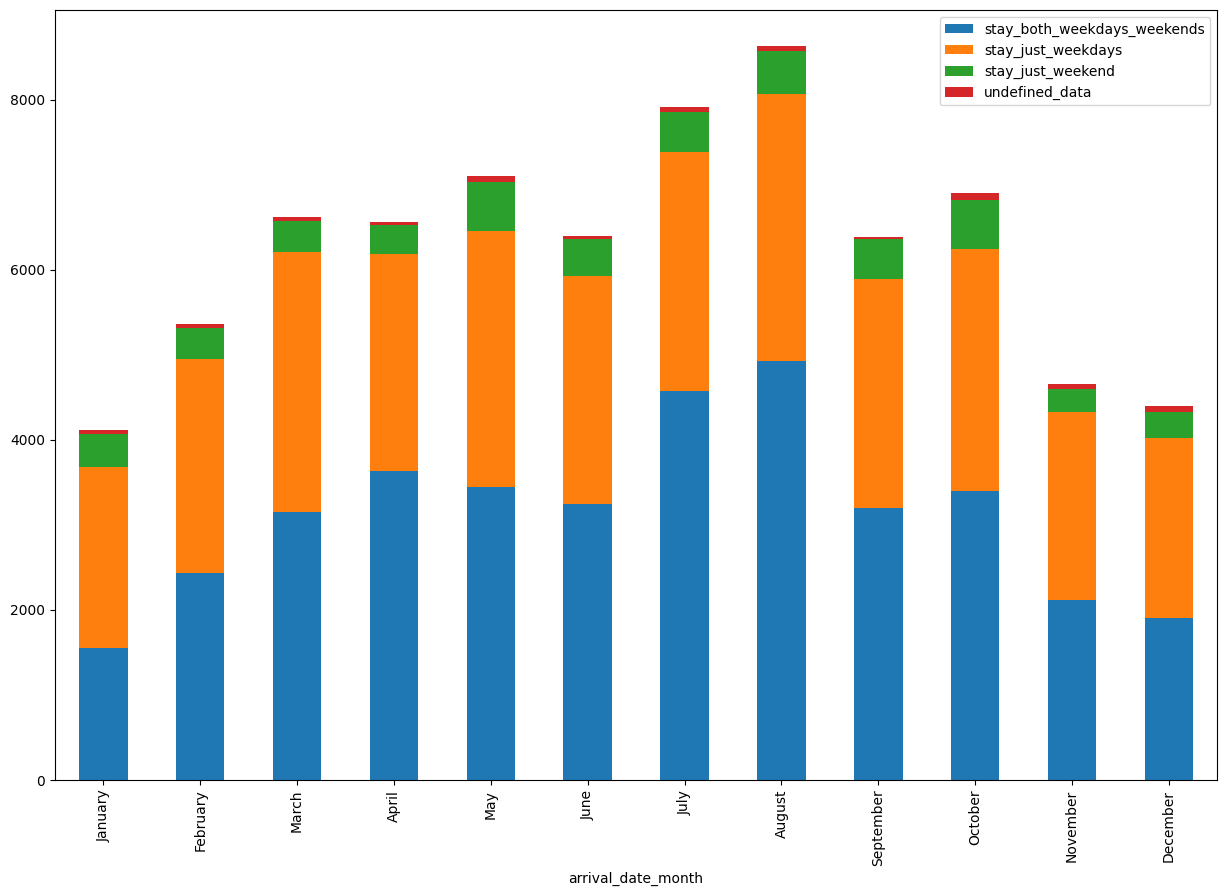

In [105]:
sorted_data.plot(kind='bar',stacked=True,figsize=(15,10))

# create some more features

In [108]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

In [109]:
def family(row):
    if (row['adults']>0) &  (row['children']>0 or row['babies']>0) :
        return 1
    else:
        return 0

In [110]:
data['is_family']=data.apply(family,axis=1)

In [111]:
data['total_customer'] = data['adults'] + data['babies'] + data['children']

In [112]:
data['total_nights']=data['stays_in_week_nights'] + data['stays_in_weekend_nights']

In [113]:
data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,0,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1


In [114]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights'],
      dtype='object')

In [115]:
data['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [117]:
data['deposit_type'].value_counts()

deposit_type
No Deposit    104461
Non Refund     14587
Refundable       162
Name: count, dtype: int64

In [118]:
dict1={'No Deposit':0, 'Non Refund':1, 'Refundable': 2}

In [119]:
data['deposit_given']=data['deposit_type'].map(dict1)

In [120]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [121]:
data.drop(columns=['adults', 'children', 'babies', 'deposit_type'],axis=1,inplace=True)

In [122]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

# apply Feature encoding on Data: 

In [123]:
data.head(6)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights,deposit_given
0,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1,0
1,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1,0
2,Resort Hotel,1,2,2016,January,1,1,0,1,BB,...,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1,0
3,Resort Hotel,0,88,2016,January,1,1,0,2,HB,...,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2,0
4,Resort Hotel,1,20,2016,January,1,1,0,2,BB,...,Transient,119.00,0,0,Canceled,12/22/2015,1,4.0,2,0
5,Resort Hotel,1,76,2016,January,1,1,1,2,BB,...,Transient,57.90,0,1,Canceled,12/20/2015,0,2.0,3,0


In [124]:
pd.set_option('display.max_columns', None)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights,deposit_given
0,Resort Hotel,0,109,2016,January,1,1,0,1,BB,RUS,Online TA,TA/TO,0,0,0,A,D,0,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1,0
1,Resort Hotel,0,109,2016,January,1,1,0,1,BB,RUS,Online TA,TA/TO,0,0,0,H,H,0,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1,0
2,Resort Hotel,1,2,2016,January,1,1,0,1,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,0,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1,0
3,Resort Hotel,0,88,2016,January,1,1,0,2,HB,ARG,Online TA,TA/TO,0,0,0,A,D,0,0,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2,0
4,Resort Hotel,1,20,2016,January,1,1,0,2,BB,PRT,Online TA,TA/TO,0,0,0,G,G,0,0,Transient,119.00,0,0,Canceled,12/22/2015,1,4.0,2,0


In [125]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

In [126]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

In [127]:
cate_features=[col for col in data.columns if data[col].dtype=='object']

In [128]:
num_features=[col for col in data.columns if data[col].dtype!='object']

In [129]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'total_nights',
 'deposit_given']

In [130]:
cate_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [131]:
data_cat=data[cate_features]

In [132]:
data.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [133]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [134]:
data_cat['cancellation']=data['is_canceled']

In [135]:
pd.set_option('display.max_columns', None)
data_cat.head(4000)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016,1
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016,0
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,City Hotel,January,BB,PRT,Groups,TA/TO,A,A,Transient,Canceled,12/2/2015,1
3996,City Hotel,January,BB,PRT,Groups,TA/TO,A,A,Transient,Canceled,12/2/2015,1
3997,City Hotel,January,BB,PRT,Groups,TA/TO,A,A,Transient,Canceled,12/2/2015,1
3998,City Hotel,January,BB,PRT,Groups,TA/TO,A,A,Transient,Canceled,12/2/2015,1


In [137]:
data_cat['country'].unique()

array(['RUS', 'PRT', 'ARG', 'FRA', 'GBR', 'DEU', 'BRA', 'IRL', 'USA',
       'KOR', 'AUT', 'ITA', 'BEL', 'ESP', 'AUS', 'LUX', 'CHE', 'EST',
       'NGA', 'CN', 'NLD', 'POL', 'TUR', 'DZA', 'CYP', 'CUB', 'SWE',
       'COL', 'UKR', 'NOR', 'ZAF', 'MAR', 'CMR', 'MYS', 'LTU', 'IRN',
       'FIN', 'THA', 'GRC', 'CHN', 'IND', 'MDG', 'ISR', 'IDN', 'DNK',
       'ISL', 'ROU', 'JPN', 'CHL', 'TUN', 'SAU', 'MEX', 'ARE', 'PER',
       'VEN', 'AGO', 'ECU', 'OMN', 'IRQ', 'MOZ', 'EGY', 'AND', 'CZE',
       'SRB', 'LVA', 'BGR', 'JOR', 'SVN', 'BLR', 'CPV', 'SGP', 'DOM',
       'PAK', 'UZB', 'SEN', 'MAC', 'TWN', 'KAZ', 'BFA', 'HRV', 'ARM',
       'KEN', 'NZL', 'HUN', 'GTM', 'SVK', 'ALB', 'GHA', 'MDV', 'ATA',
       'ASM', 'PAN', 'CRI', 'BIH', 'MUS', 'COM', 'SUR', 'JAM', 'CAF',
       'ZWE', 'HND', 'RWA', 'GIB', 'TZA', 'LIE', 'GNB', 'LKA', 'KWT',
       'MCO', 'LBN', 'LBY', 'SYR', 'QAT', 'TGO', 'UGA', 'CIV', 'URY',
       'GEO', 'AZE', 'HKG', 'ETH', 'MLT', 'PHL', 'NPL', 'BHS', 'ZMB',
       'KHM', 'BGD', 

In [145]:
cols=data_cat.columns

In [146]:
cols=cols[0:-1]

In [147]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [148]:
### Perform Mean Encoding Technique 
for col in cols:
    dict2=data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col]=data_cat[col].map(dict2)

In [149]:
data_cat.head(4000)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.305016,0.374106,0.379365,0.367590,0.410598,0.391567,0.251373,0.254504,0.0,0.048276,0
1,0.277674,0.305016,0.374106,0.379365,0.367590,0.410598,0.407654,0.352528,0.254504,0.0,0.048276,0
2,0.277674,0.305016,0.374106,0.562958,0.367590,0.410598,0.318108,0.251373,0.407864,1.0,0.101010,1
3,0.277674,0.305016,0.344653,0.252336,0.367590,0.410598,0.391567,0.251373,0.407864,0.0,0.108247,0
4,0.277674,0.305016,0.374106,0.562958,0.367590,0.410598,0.364723,0.306002,0.407864,1.0,0.684211,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.417859,0.305016,0.374106,0.562958,0.611086,0.410598,0.391567,0.445055,0.407864,1.0,0.781690,1
3996,0.417859,0.305016,0.374106,0.562958,0.611086,0.410598,0.391567,0.445055,0.407864,1.0,0.781690,1
3997,0.417859,0.305016,0.374106,0.562958,0.611086,0.410598,0.391567,0.445055,0.407864,1.0,0.781690,1
3998,0.417859,0.305016,0.374106,0.562958,0.611086,0.410598,0.391567,0.445055,0.407864,1.0,0.781690,1


In [150]:
data_cat['country'].unique()

array([0.37936508, 0.56295827, 0.25233645, 0.18584751, 0.20231023,
       0.16719286, 0.37353735, 0.24659158, 0.23936933, 0.41353383,
       0.1821061 , 0.35442701, 0.20239112, 0.25432243, 0.25117371,
       0.38111888, 0.24797219, 0.21686747, 0.61764706, 0.19859265,
       0.18402282, 0.23420479, 0.41129032, 0.2038835 , 0.21568627,
       0.        , 0.22254902, 0.32394366, 0.29411765, 0.29818781,
       0.3875    , 0.42084942, 0.10714286, 0.08641975, 0.2804878 ,
       0.15470852, 0.30508475, 0.2734375 , 0.46246246, 0.23178808,
       0.25261584, 0.68571429, 0.25057471, 0.07017544, 0.268     ,
       0.14213198, 0.24615385, 0.48717949, 0.6875    , 0.11764706,
       0.84313725, 0.20689655, 0.46153846, 0.56629834, 0.2962963 ,
       0.22222222, 0.28358209, 0.34375   , 0.71428571, 0.21637427,
       0.02970297, 0.16363636, 0.16      , 0.14285714, 0.26785714,
       0.34615385, 0.5       , 0.42105263, 0.57142857, 0.64285714,
       0.72727273, 0.9375    , 0.2745098 , 0.26315789, 0.25   

# Handle Outliers :

In [152]:
data[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0,109,2016,1,1,0,1,0,0,0,0,0,59.94,0,1,0,2.0,1,0
1,0,109,2016,1,1,0,1,0,0,0,0,0,116.10,1,1,1,4.0,1,0
2,1,2,2016,1,1,0,1,0,0,0,0,0,89.00,0,1,0,2.0,1,0
3,0,88,2016,1,1,0,2,0,0,0,0,0,73.46,0,2,0,2.0,2,0
4,1,20,2016,1,1,0,2,0,0,0,0,0,119.00,0,0,1,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0,173,2016,53,26,3,8,0,0,0,4,0,117.82,0,1,1,3.0,11,0
119206,0,17,2016,53,30,2,5,0,0,0,0,0,90.34,0,1,0,2.0,7,0
119207,0,107,2016,53,31,2,5,0,0,0,0,0,103.57,0,0,0,2.0,7,0
119208,0,310,2016,53,27,2,10,0,0,0,2,0,68.57,0,2,0,2.0,12,0


In [153]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)

In [154]:
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [155]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  float64
 1   arrival_date_month              119210 non-null  float64
 2   meal                            119210 non-null  float64
 3   country                         119210 non-null  float64
 4   market_segment                  119210 non-null  float64
 5   distribution_channel            119210 non-null  float64
 6   reserved_room_type              119210 non-null  float64
 7   assigned_room_type              119210 non-null  float64
 8   customer_type                   119210 non-null  float64
 9   reservation_status              119210 non-null  float64
 10  reservation_status_date         119210 non-null  float64
 11  cancellation                    119210 non-null  int64  
 12  is_canceled     

In [156]:
dataframe.drop(['cancellation'],axis=1,inplace=True)

In [157]:
dataframe.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,0.048276,0,109,2016,1,1,0,1,0,0,0,0,0,59.94,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,0.048276,0,109,2016,1,1,0,1,0,0,0,0,0,116.10,1,1,1,4.0,1,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,0.101010,1,2,2016,1,1,0,1,0,0,0,0,0,89.00,0,1,0,2.0,1,0


In [158]:
pd.set_option('display.max_columns', None)
dataframe.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,0.048276,0,109,2016,1,1,0,1,0,0,0,0,0,59.94,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,0.048276,0,109,2016,1,1,0,1,0,0,0,0,0,116.10,1,1,1,4.0,1,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,0.101010,1,2,2016,1,1,0,1,0,0,0,0,0,89.00,0,1,0,2.0,1,0
3,0.277674,0.305016,0.344653,0.252336,0.36759,0.410598,0.391567,0.251373,0.407864,0.0,0.108247,0,88,2016,1,1,0,2,0,0,0,0,0,73.46,0,2,0,2.0,2,0
4,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.364723,0.306002,0.407864,1.0,0.684211,1,20,2016,1,1,0,2,0,0,0,0,0,119.00,0,0,1,4.0,2,0


<Axes: xlabel='lead_time', ylabel='Density'>

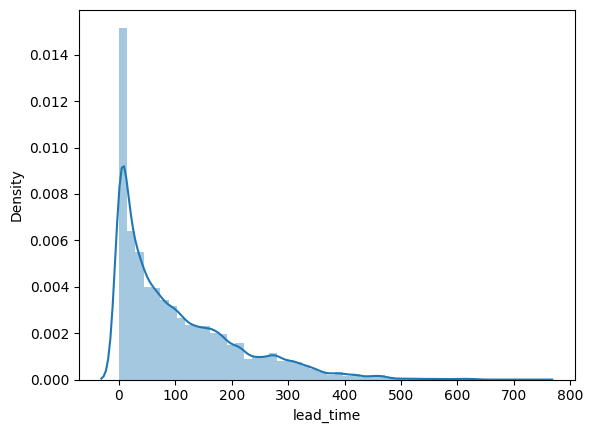

In [159]:
sns.distplot(dataframe['lead_time'])

In [160]:
def handle_outlier(col):
    dataframe[col]=np.log1p(dataframe[col])

In [161]:
handle_outlier('lead_time')

<Axes: xlabel='lead_time', ylabel='Density'>

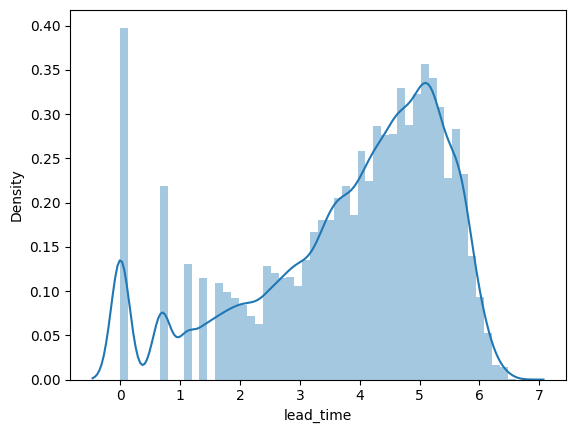

In [162]:
sns.distplot(dataframe['lead_time'])

<Axes: xlabel='adr', ylabel='Density'>

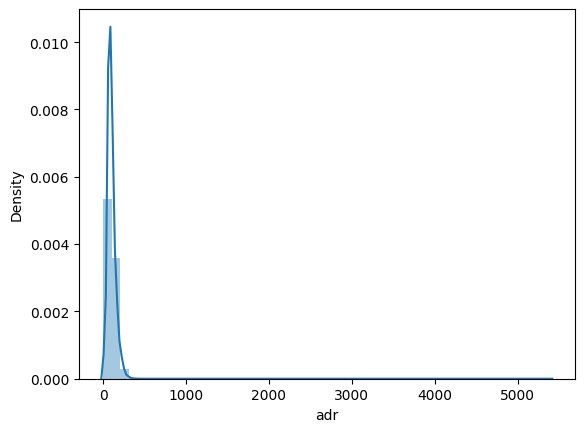

In [163]:
sns.distplot(dataframe['adr'])

In [164]:
dataframe[dataframe['adr']<0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
14989,0.277674,0.322277,0.374106,0.20231,0.611086,0.174868,0.391567,0.352528,0.254504,0.0,0.328767,0,5.278115,2017,10,5,4,6,1,0,2,2,0,-6.38,0,0,0,2.0,10,0


In [165]:
handle_outlier('adr')

In [166]:
dataframe['adr'].isnull().sum()

1

In [167]:
### now why this missing value , as we have already deal with the missing values..'
### bcz we have negative value in 'adr' feature as '-6.38'  ,& if we apply ln(1+x) , we will get 'nan'
## bcz log wont take negative values..

<Axes: xlabel='adr', ylabel='Density'>

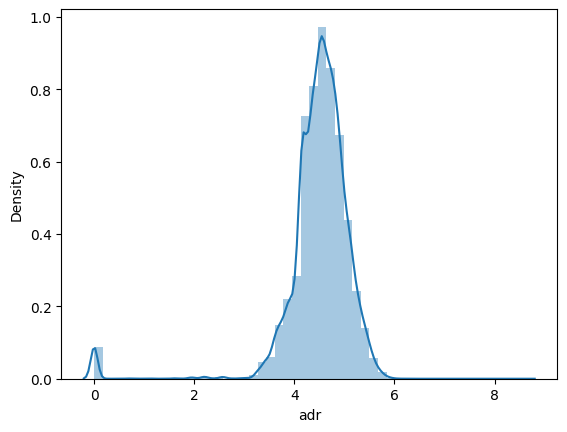

In [168]:
sns.distplot(dataframe['adr'].dropna())

# Select important Features using Co-relation & univariate analysis

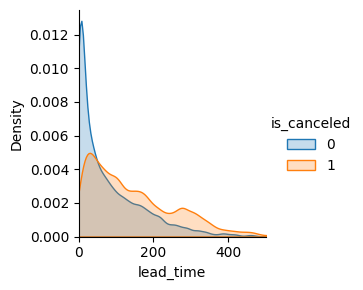

In [169]:
sns.FacetGrid(data,hue='is_canceled',xlim=(0,500)).map(sns.kdeplot,'lead_time',shade=True).add_legend()

In [170]:
corr=dataframe.corr()

In [171]:
corr

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
hotel,1.000000,0.051197,0.061782,-0.040609,0.102592,0.182266,0.198171,0.280884,-0.008378,0.137082,0.107481,0.137082,0.109869,0.035176,0.001241,-0.001678,-0.187816,-0.235955,-0.052526,-0.012261,-0.004467,-0.076598,0.072725,0.154041,-0.218961,-0.043478,-0.058094,-0.038762,-0.249747,0.159425
arrival_date_month,0.051197,1.000000,-0.010208,-0.052405,0.047902,0.077075,-0.038801,0.015456,-0.029636,0.069886,-0.089512,0.069886,0.241413,0.015509,0.155653,0.002248,0.046618,0.036681,-0.057691,0.008800,-0.021971,-0.011049,0.029164,0.228179,-0.021910,0.002763,0.020491,0.079090,0.045648,0.052196
meal,0.061782,-0.010208,1.000000,0.022476,-0.026007,-0.025486,0.010035,0.013913,0.105767,0.050584,0.038298,0.050584,-0.040315,-0.024568,0.015308,-0.005737,-0.040114,-0.053540,0.009827,0.103606,0.011109,-0.027189,-0.031562,-0.019908,0.003455,0.006875,0.001466,-0.003447,-0.055689,0.047503
country,-0.040609,-0.052405,0.022476,1.000000,0.078982,-0.129774,0.153177,0.125415,-0.029320,0.357232,0.340400,0.357232,-0.071919,-0.180684,0.017322,0.001898,-0.146467,-0.138467,0.153305,0.093266,0.091795,-0.061513,0.067054,-0.160520,0.007613,-0.200822,-0.044139,-0.117351,-0.160759,0.385080
market_segment,0.102592,0.047902,-0.026007,0.078982,1.000000,0.540116,0.182813,0.209272,-0.265606,0.267006,0.276512,0.267006,0.397346,-0.064498,0.009895,0.008062,0.001091,-0.006660,-0.169328,0.074710,-0.117519,-0.057578,0.096385,-0.004009,-0.145726,-0.155463,-0.104584,-0.023874,-0.004546,0.399983
distribution_channel,0.182266,0.077075,-0.025486,-0.129774,0.540116,1.000000,0.070381,0.118970,-0.023234,0.177167,0.081435,0.177167,0.332215,0.013924,0.010940,-0.003948,0.079220,0.072280,-0.206695,-0.003868,-0.142650,-0.118461,0.048001,0.126516,-0.146562,0.075047,-0.026278,0.087776,0.084999,0.102497
reserved_room_type,0.198171,-0.038801,0.010035,0.153177,0.182813,0.070381,1.000000,0.722724,-0.143390,0.072769,0.148830,0.072769,0.026146,-0.092503,0.010119,-0.016947,-0.147017,-0.175821,0.032507,0.049290,0.022533,-0.040134,0.068336,-0.185932,-0.093401,-0.161406,-0.133748,-0.246347,-0.188866,0.199905
assigned_room_type,0.280884,0.015456,0.013913,0.125415,0.209272,0.118970,0.722724,1.000000,-0.084025,0.201570,0.191989,0.201570,0.142173,-0.025296,0.005852,-0.011957,-0.082287,-0.095544,-0.028268,0.063309,-0.003205,-0.096277,0.067129,-0.038347,-0.131035,-0.135337,-0.179356,-0.229081,-0.103571,0.257614
customer_type,-0.008378,-0.029636,0.105767,-0.029320,-0.265606,-0.023234,-0.143390,-0.084025,1.000000,0.136617,0.055937,0.136617,-0.135881,0.204725,-0.067980,-0.002012,0.037025,0.031095,0.002727,-0.021358,0.024716,-0.095486,-0.101833,0.117592,0.061786,0.137114,0.106618,0.124318,0.037720,0.106356
reservation_status,0.137082,0.069886,0.050584,0.357232,0.267006,0.177167,0.072769,0.201570,0.136617,1.000000,0.488307,1.000000,0.320075,0.016622,0.008315,-0.005948,-0.001323,0.025542,-0.083745,0.110139,-0.057365,-0.144832,0.054301,0.081660,-0.195701,-0.234877,-0.013226,0.044826,0.018554,0.468676


In [172]:
corr['is_canceled'].sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488307
deposit_given                     0.468676
country                           0.357232
lead_time                         0.320075
market_segment                    0.267006
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
previous_cancellations            0.110139
adr                               0.081660
reserved_room_type                0.072769
arrival_date_month                0.069886
days_in_waiting_list              0.054301
meal                              0.050584
total_customer                    0.044826
stays_in_week_nights              0.025542
total_nights                      0.018554
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
stays_in_weekend_nights          -0.001323
arrival_dat

In [173]:
corr['is_canceled'].sort_values(ascending=False).index

Index(['reservation_status', 'is_canceled', 'reservation_status_date',
       'deposit_given', 'country', 'lead_time', 'market_segment',
       'assigned_room_type', 'distribution_channel', 'hotel', 'customer_type',
       'previous_cancellations', 'adr', 'reserved_room_type',
       'arrival_date_month', 'days_in_waiting_list', 'meal', 'total_customer',
       'stays_in_week_nights', 'total_nights', 'arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month', 'is_family',
       'previous_bookings_not_canceled', 'is_repeated_guest',
       'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [174]:
features_to_drop=['reservation_status', 'reservation_status_date','arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month']

In [175]:
dataframe.drop(features_to_drop,axis=1,inplace=True)

In [176]:
dataframe.shape

(119210, 24)

# Find Important features for model building

In [177]:
dataframe.head(2)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,is_canceled,lead_time,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0,4.70048,1,0,0,0,0,0,4.109890,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0,4.70048,1,0,0,0,0,0,4.763028,1,1,1,4.0,1,0


In [178]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
customer_type                     0
is_canceled                       0
lead_time                         0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
is_family                         0
total_customer                    0
total_nights                      0
deposit_given                     0
dtype: int64

In [179]:
dataframe.dropna(inplace=True)

In [180]:
dataframe.to_csv('data_predict.csv', index=False)

In [181]:
## separate dependent & independent features

In [182]:
x=dataframe.drop('is_canceled',axis=1)

In [183]:
y=dataframe['is_canceled']

In [184]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [185]:
##Lasso(alpha=0.005)
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.


In [186]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005))

In [187]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [188]:
feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [189]:
cols=x.columns

In [190]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'lead_time', 'stays_in_week_nights',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

In [191]:
# let's print the number of selected features

selected_feature=cols[feature_sel_model.get_support()]

In [192]:
selected_feature

Index(['country', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer', 'total_nights',
       'deposit_given'],
      dtype='object')

In [194]:
x=x[selected_feature]
x

,country,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_customer,total_nights,deposit_given
0,0.379365,4.700480,0,0,0,0,4.109890,0,1,2.0,1,0
1,0.379365,4.700480,0,0,0,0,4.763028,1,1,4.0,1,0
2,0.562958,1.098612,0,0,0,0,4.499810,0,1,2.0,1,0
3,0.252336,4.488636,0,0,0,0,4.310262,0,2,2.0,2,0
4,0.562958,3.044522,0,0,0,0,4.787492,0,0,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0.373537,5.159055,0,0,4,0,4.777610,0,1,3.0,11,0
119206,0.185848,2.890372,0,0,0,0,4.514589,0,1,2.0,7,0
119207,0.185848,4.682131,0,0,0,0,4.649857,0,0,2.0,7,0
119208,0.167193,5.739793,0,0,2,0,4.242333,0,2,2.0,12,0


In [195]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119209 entries, 0 to 119209
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   country                         119209 non-null  float64
 1   lead_time                       119209 non-null  float64
 2   previous_cancellations          119209 non-null  int64  
 3   previous_bookings_not_canceled  119209 non-null  int64  
 4   booking_changes                 119209 non-null  int64  
 5   days_in_waiting_list            119209 non-null  int64  
 6   adr                             119209 non-null  float64
 7   required_car_parking_spaces     119209 non-null  int64  
 8   total_of_special_requests       119209 non-null  int64  
 9   total_customer                  119209 non-null  float64
 10  total_nights                    119209 non-null  int64  
 11  deposit_given                   119209 non-null  int64  
dtypes: float64(4), int64(

In [196]:
x['country'].unique()

array([0.37936508, 0.56295827, 0.25233645, 0.18584751, 0.20231023,
       0.16719286, 0.37353735, 0.24659158, 0.23936933, 0.41353383,
       0.1821061 , 0.35442701, 0.20239112, 0.25432243, 0.25117371,
       0.38111888, 0.24797219, 0.21686747, 0.61764706, 0.19859265,
       0.18402282, 0.23420479, 0.41129032, 0.2038835 , 0.21568627,
       0.        , 0.22254902, 0.32394366, 0.29411765, 0.29818781,
       0.3875    , 0.42084942, 0.10714286, 0.08641975, 0.2804878 ,
       0.15470852, 0.30508475, 0.2734375 , 0.46246246, 0.23178808,
       0.25261584, 0.68571429, 0.25057471, 0.07017544, 0.268     ,
       0.14213198, 0.24615385, 0.48717949, 0.6875    , 0.11764706,
       0.84313725, 0.20689655, 0.46153846, 0.56629834, 0.2962963 ,
       0.22222222, 0.28358209, 0.34375   , 0.71428571, 0.21637427,
       0.02970297, 0.16363636, 0.16      , 0.14285714, 0.26785714,
       0.34615385, 0.5       , 0.42105263, 0.57142857, 0.64285714,
       0.72727273, 0.9375    , 0.2745098 , 0.26315789, 0.25   

In [197]:
y

0         0
1         0
2         1
3         0
4         1
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: is_canceled, Length: 119209, dtype: int64

# Build ML model..

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.25,random_state=42)

In [200]:
X_train.shape

(89406, 12)

In [201]:
from sklearn.linear_model import LogisticRegression


In [202]:
logreg=LogisticRegression()

In [203]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [204]:
pred=logreg.predict(X_test)

In [205]:
pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [206]:
from sklearn.metrics import confusion_matrix

In [207]:
confusion_matrix(y_test,pred)

array([[17184,  1543],
       [ 4527,  6549]], dtype=int64)

In [208]:
from sklearn.metrics import accuracy_score

In [209]:
accuracy_score(y_test,pred)

0.7963292286011475

# Cross-validate model..

In [210]:
from sklearn.model_selection import cross_val_score

In [211]:
score=cross_val_score(logreg,x,y,cv=10)

In [212]:
score

array([0.77317339, 0.7783743 , 0.78164584, 0.81461287, 0.81494841,
       0.73576042, 0.74440064, 0.84917373, 0.83097056, 0.79907718])

In [213]:
score.mean()

0.7922137327168962

# Apply multiple algos..

In [214]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [159]:
models=[]

models.append(('LogisticRegression',LogisticRegression()))
models.append(('Naive_bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier(n_estimators=100, random_state=42)))
models.append(('Decision_tree',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))

In [160]:
for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    
    predictions=model.predict(X_test)
    
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    
    from sklearn.metrics import accuracy_score
    acc=accuracy_score(predictions,y_test)
    print(acc)
    print('\n')

LogisticRegression
[[17312  4648]
 [ 1415  6428]]
0.7965641042848035


Naive_bayes
[[ 6744   652]
 [11983 10424]]
0.5760493910009059


Random Forest
[[17182  2747]
 [ 1545  8329]]
0.8559876522497735


Decision_tree
[[16065  2664]
 [ 2662  8412]]
0.8212931584068718


KNN
[[16792  3409]
 [ 1935  7667]]
0.8206891923631849




In [165]:
X_test

,country,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_customer,total_nights,deposit_given
28497,0.562958,4.976734,0,0,0,0,4.667206,0,1,3.0,3,0
17990,0.562958,5.529429,0,0,0,93,4.836282,0,0,2.0,3,1
41187,0.247972,4.369448,0,0,0,0,4.789573,0,0,2.0,4,0
94332,0.167193,3.610918,0,0,0,0,4.477337,0,0,2.0,3,0
92868,0.202310,3.871201,0,0,0,0,4.837075,0,1,2.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
56182,0.167193,3.367296,0,0,1,0,4.700480,0,2,2.0,1,0
112577,0.562958,5.010635,0,0,0,0,4.234107,0,0,2.0,3,1
8554,0.202310,4.304065,0,0,0,0,3.713572,0,0,2.0,3,0
92673,0.354427,4.174387,0,0,0,0,4.757891,0,2,2.0,3,0


In [221]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)

[1 1 1 ... 0 0 0]
Random Forest Classifier Accuracy: 0.8472636982854075


In [222]:
import joblib

# Save the model to a file
joblib.dump(rf_classifier, 'random_forest_model.pkl')

['random_forest_model.pkl']